# Women E-commerce Clothing Review

Author: Peiyu Xu

# Introduction and Motivation


With the growth of e-commerce in particular in the apparel industry, user-submitted open-ended text reviews often accompanied with a Likert scale rating and questions about the willingness of the customer to recommend the product are becoming an increasingly important metric with which retailers can gather feedback directly from their clientele. This project considers the importance of this data relevant to the industry and executes a two-step analysis of a dataset containing online reviews left for an e-commerce merchant in order to make recommendations to benefit the business. A classification analysis was conducted comparing K-nearest neighbors, support vector machine, logistic regression and random forest models and validating with a test data subset, to determine the variables that are key drivers of the recommendation intent of the consumer. In a second step, a text mining experiment was used to examine and visualize customer satisfaction and understand customer preferences from the open-ended text responses collected.

Source of the dataset: https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

This is a part of my course project. Co-contributors are: Zhen, Alex, Qiaoshan, Shyenna, and Yu. 

Part of my code is inspired by: https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/


# Variable Information
1. **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
2. **Age**:Positive Integer variable of the reviewers age.
3. **Title**:String variable for the title of the review
4. **Review Text**: String variable for the review body.
5. **Rating**:Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
6. **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
7. **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
8. **Division Name**: Categorical name of the product high level division.
9. **Department Name**: Categorical name of the product department name.
10. **Class Name**: Categorical name of the product class name.

## Import dataset and simple exploration

In [1]:
# packages
import pandas as pd
import numpy as np
import nltk
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns

In [2]:
df=pd.read_csv(r"Womens Clothing E-Commerce Reviews.csv")

In [3]:
df.shape

(23486, 11)

In [4]:
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [5]:
# drop the index column
df.drop('Unnamed: 0',1,inplace=True)

In [6]:
# check missing values
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [7]:
# change the data type of Clothing ID
df['Clothing ID']=df['Clothing ID'].astype(str)

In [8]:
# check correlation
df.corr()

,Age,Rating,Recommended IND,Positive Feedback Count
Age,1.000000,0.026831,0.030622,0.043079
Rating,0.026831,1.000000,0.792336,-0.064961
Recommended IND,0.030622,0.792336,1.000000,-0.069045
Positive Feedback Count,0.043079,-0.064961,-0.069045,1.000000


In [9]:
df[['Division Name','Department Name','Class Name']].describe().T.drop('count',1)

,unique,top,freq
Division Name,3,General,13850
Department Name,6,Tops,10468
Class Name,20,Dresses,6319


In [10]:
df1=df.copy()
df1=df1.dropna(subset=["Division Name"],axis=0)
df1.shape

(23472, 10)

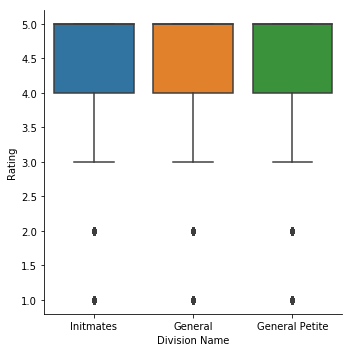

In [11]:
# division * rating
sns.catplot(x="Division Name", y="Rating", kind="box", data=df1)

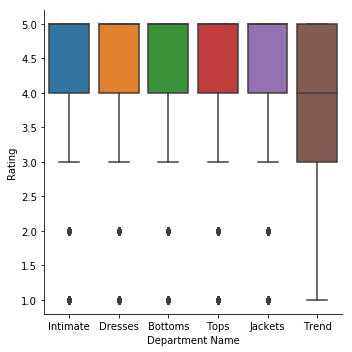

In [12]:
# department * rating
sns.catplot(x="Department Name", y="Rating", kind="box", data=df1)

The Trend Department doesn't look good. At least 25% of ratings are 1. 

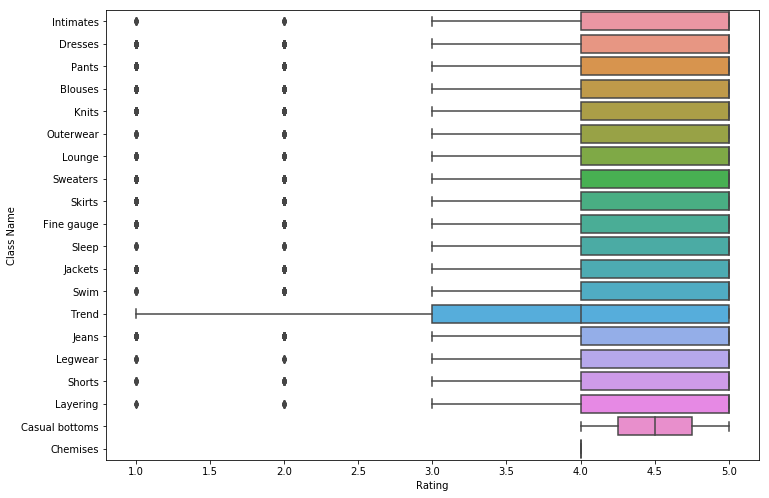

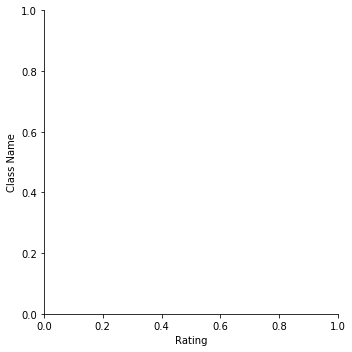

In [13]:
# class * rating
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.catplot(ax=ax,y="Class Name", x="Rating", kind="box",orient="h",data=df1);

[1644 5328 6857 4711 3060 1543  230   84   15]
[18. 27. 36. 45. 54. 63. 72. 81. 90. 99.]


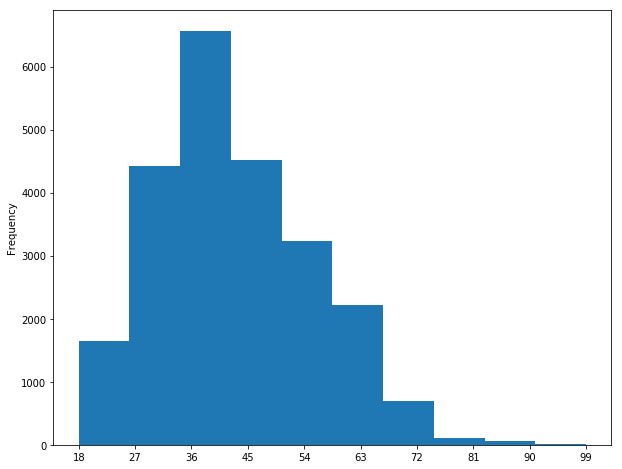

In [14]:
# histogram for age
count, bin_edges=np.histogram(df1['Age'], 9)
print(count)  #how many bins 
print(bin_edges)
df1['Age'].plot(kind='hist', figsize=(10 ,8 ), xticks=bin_edges)

So most of the customers are middle-aged.

# Review Analysis

In [15]:
# import packages
import nltk

In [16]:
# check data types
df1.dtypes

Clothing ID                object
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [17]:
df1['Review Text']=df1['Review Text'].astype(str)

In [18]:
# number of words
df1['word_count'] = df1['Review Text'].apply(lambda x: len(str(x).split(" ")))
df1['word_count'].head()

0     8
1    67
2    98
3    22
4    36
Name: word_count, dtype: int64

In [19]:
# number of characters, include space
df1['char_count'] = df1['Review Text'].str.len()
df1['char_count'].head()

0     53
1    303
2    500
3    124
4    192
Name: char_count, dtype: int64

In [20]:
# avg word length, total length of sentence/sum the length of all words
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

df1['avg_word'] = df1['Review Text'].apply(lambda x: avg_word(x))
df1[['Review Text','avg_word']].head()

,Review Text,avg_word
0,Absolutely wonderful - silky and sexy and comf...,5.750000
1,Love this dress! it's sooo pretty. i happene...,3.822581
2,I had such high hopes for this dress and reall...,4.112245
3,"I love, love, love this jumpsuit. it's fun, fl...",4.681818
4,This shirt is very flattering to all due to th...,4.361111


In [21]:
# number of stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
df1['stopwords'] = df1['Review Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
df1[['Review Text','stopwords']].head()

,Review Text,stopwords
0,Absolutely wonderful - silky and sexy and comf...,2
1,Love this dress! it's sooo pretty. i happene...,30
2,I had such high hopes for this dress and reall...,45
3,"I love, love, love this jumpsuit. it's fun, fl...",6
4,This shirt is very flattering to all due to th...,19


In [22]:
# number or numerics
df1['numerics']=df1['Review Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
df1[['Review Text','numerics']].head()
df1['numerics'].describe()

count    23472.000000
mean         0.307132
std          0.717852
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: numerics, dtype: float64

In [23]:
# number of uppercase words
df1['upper']=df1['Review Text'].apply(lambda x:len([x for x in x.split() if x.isupper()]))
df1[['Review Text','upper']].head()

,Review Text,upper
0,Absolutely wonderful - silky and sexy and comf...,0
1,Love this dress! it's sooo pretty. i happene...,0
2,I had such high hopes for this dress and reall...,1
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,0


## Basic Pre-processing

In [24]:
# convert to lower case
df1['text']=df1['Review Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df1['text'].head()

0    absolutely wonderful - silky and sexy and comf...
1    love this dress! it's sooo pretty. i happened ...
2    i had such high hopes for this dress and reall...
3    i love, love, love this jumpsuit. it's fun, fl...
4    this shirt is very flattering to all due to th...
Name: text, dtype: object

In [25]:
# remove punctuation
df1['text']=df1['text'].str.replace('[^\w\s]','')
df1['text'].head()

0    absolutely wonderful  silky and sexy and comfo...
1    love this dress its sooo pretty i happened to ...
2    i had such high hopes for this dress and reall...
3    i love love love this jumpsuit its fun flirty ...
4    this shirt is very flattering to all due to th...
Name: text, dtype: object

In [26]:
# remove stop words
stop=stopwords.words('english')
df1['text']=df1['text'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
df1['text'].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hopes dress really wanted work initially ...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: text, dtype: object

In [27]:
# check the most common words
freq = pd.Series(' '.join(df1['text']).split()).value_counts()
freq[:10]

dress    10460
love      8910
size      8685
top       7323
fit       7235
like      6991
wear      6409
great     6073
im        5973
would     5009
dtype: int64

In [28]:
# check least common words
freq[-10:]

checklist         1
beautifulive      1
fashionwise       1
retire            1
streaking         1
nocal             1
justeverything    1
362636            1
8italian          1
duties            1
dtype: int64

## Sentiment Analysis

In [29]:
# sentiment 
from textblob import TextBlob
testimonial = TextBlob(df1['text'][1])
print(testimonial.sentiment)
print(" ")
print(testimonial.sentiment.polarity)

Sentiment(polarity=0.31875000000000003, subjectivity=0.7250000000000001)
 
0.31875000000000003


In [30]:
def detect_polarity(text):
    return TextBlob(text).sentiment.polarity
def detect_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [31]:
df1['polarity'] = df1['text'].apply(detect_polarity)
df1['polarity'].head()

0    0.633333
1    0.318750
2    0.082300
3    0.500000
4    0.458333
Name: polarity, dtype: float64

In [32]:
df1['subjectivity']=df1['text'].apply(detect_subjectivity)
df1['subjectivity'].head()

0    0.933333
1    0.725000
2    0.345866
3    0.625000
4    0.658333
Name: subjectivity, dtype: float64

In [33]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [34]:
SIA = SentimentIntensityAnalyzer()
df1['text']= df1["text"].astype(str)

# Applying Model, Variable Creation
df1['Polarity Score']=df1["text"].apply(lambda x:SIA.polarity_scores(x)['compound'])
df1['Neutral Score']=df1["text"].apply(lambda x:SIA.polarity_scores(x)['neu'])
df1['Negative Score']=df1["text"].apply(lambda x:SIA.polarity_scores(x)['neg'])
df1['Positive Score']=df1["text"].apply(lambda x:SIA.polarity_scores(x)['pos'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
df1['Sentiment']=''
df1.loc[df1['Polarity Score']>0,'Sentiment']='Positive'
df1.loc[df1['Polarity Score']==0,'Sentiment']='Neutral'
df1.loc[df1['Polarity Score']<0,'Sentiment']='Negative'

In [35]:
# stemming
from nltk.stem import PorterStemmer
st=PorterStemmer()
df1['stem']=df1['text'].apply(lambda x:" ".join([st.stem(word) for word in x.split()]))
df1['stem'].head()

0                    absolut wonder silki sexi comfort
1    love dress sooo pretti happen find store im gl...
2    high hope dress realli want work initi order p...
3    love love love jumpsuit fun flirti fabul everi...
4    shirt flatter due adjust front tie perfect len...
Name: stem, dtype: object

In [36]:
# lemmatazation
from textblob import Word
df1['lem']=df1['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df1['lem'].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: lem, dtype: object

In [37]:
# group by department
df1.groupby('Division Name', axis=0).mean()

,Age,Rating,Recommended IND,Positive Feedback Count,word_count,char_count,avg_word,stopwords,numerics,upper,polarity,subjectivity,Polarity Score,Neutral Score,Negative Score,Positive Score
Division Name,,,,,,,,,,,,,,,,
General,43.345848,4.176606,0.816823,2.578845,58.650181,300.464910,4.148952,28.250181,0.313574,0.378845,0.241515,0.543346,0.749659,0.595031,0.049986,0.354984
General Petite,43.334729,4.211084,0.825985,2.601601,58.220320,298.179433,4.147300,28.036207,0.312069,0.381034,0.247457,0.550691,0.755432,0.592675,0.047825,0.359498
Initmates,41.137816,4.286285,0.852197,1.804261,52.382157,270.660453,4.195092,24.945406,0.221039,0.339547,0.241751,0.545936,0.722585,0.595390,0.045334,0.359300


Interpretation of the above table:
I aggregate the numerical values by Division Name. From this, I can profile customers.

1. The General Division: Customers are middle-aged and less generous on giving 5-star ratings. They are the least possible to recommend the product but the average positive feedback count is close to that of "General Petite" which means reviews are generally positive.


2. The average age and review features of the customers from the General Petite Division are simliar to customers from the General Division.


3. Customers of Intimates are the youngest. They are highly likely to recommend the intimates products and they used less words in their reviews. However, their reviews are less identified as positive, compared to other groups of customers.

## Advanced Text Processing

In [38]:
# document frequency
freq = pd.Series(' '.join(df1['lem']).split()).value_counts()
# show top 20
freq.head(20)

dress         11319
fit           10088
size           9347
love           8962
top            8256
like           7017
color          6902
look           6872
wear           6507
great          6073
im             5973
would          5009
fabric         4843
small          4561
really         3920
ordered        3831
little         3769
perfect        3729
one            3694
flattering     3483
dtype: int64

In [39]:
# word cloud
from wordcloud import WordCloud, STOPWORDS
print ('Wordcloud is installed and imported!')
import matplotlib as mpl
import matplotlib.pyplot as plt

Wordcloud is installed and imported!


In [40]:
stopwords = set(STOPWORDS)

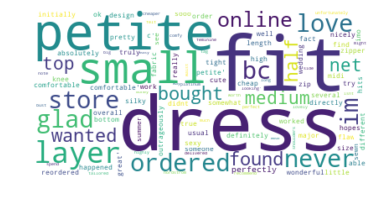

In [41]:
# initate a wordcloud object
text = df1['text'].values
word_cloud=WordCloud(background_color='white',
    stopwords=stopwords)
word_cloud.generate(str(text))

# show wordcloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
# remove more words
# some words are so frequent that they hardly contribute to our project
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['like','im', 'would', 'ordered', 'bought', 'look', 'one','also', 'got', 'x', 'think', 'dress']
stopwords.extend(newStopWords)

In [43]:
df1['text_new']=df1['lem'].apply(lambda x:" ".join(x for x in x.split() if x not in stopwords))
df1['text_new'].head()

0          absolutely wonderful silky sexy comfortable
1    love sooo pretty happened find store glad bc n...
2    high hope really wanted work initially petite ...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: text_new, dtype: object

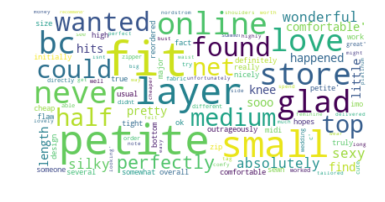

In [44]:
# a new wordcloud
# initate a wordcloud object
text_new = df1['text'].values
word_cloud1=WordCloud(background_color='white',
    stopwords=stopwords)
word_cloud1.generate(str(text_new))

# show wordcloud
plt.imshow(word_cloud1, interpolation='bilinear')
plt.axis('off')
plt.show()

## Machine Learning-Classfication

Objective: to predict the intention of recommendation (the "Recommended IND" (0 or 1) in the dataset)

Methods:
1. Random Forest
2. SVM
3. Logistic Regression
4. KNN

In [45]:
# dummy variable for department name
department_dummy=pd.get_dummies(df1['Department Name'],prefix='department')
df1=pd.concat([df1, department_dummy], axis=1)

In [46]:
# check correlation before modeling
df1.corr()

,Age,Rating,Recommended IND,Positive Feedback Count,word_count,char_count,avg_word,stopwords,numerics,upper,...,Polarity Score,Neutral Score,Negative Score,Positive Score,department_Bottoms,department_Dresses,department_Intimate,department_Jackets,department_Tops,department_Trend
Age,1.000000,0.026967,0.030712,0.043049,0.024217,0.026493,0.033085,0.017470,0.004070,-0.022694,...,0.016427,-0.005461,-0.013998,0.010774,-0.003848,-0.053665,-0.043826,0.013332,0.067594,0.004988
Rating,0.026967,1.000000,0.792311,-0.064820,-0.073691,-0.072843,0.015851,-0.087800,0.011615,-0.043062,...,0.317577,-0.177115,-0.335340,0.303233,0.036895,-0.024459,0.021520,0.013325,-0.018841,-0.024462
Recommended IND,0.030712,0.792311,1.000000,-0.068954,-0.044572,-0.046387,-0.006198,-0.056474,0.024739,-0.052608,...,0.288061,-0.132454,-0.312005,0.251060,0.033358,-0.022320,0.020609,0.007844,-0.016676,-0.015453
Positive Feedback Count,0.043049,-0.064820,-0.068954,1.000000,0.202720,0.208661,0.017806,0.194297,0.049883,0.028909,...,0.028504,0.063914,0.033118,-0.074542,-0.032361,0.058568,-0.032175,0.010845,-0.017310,0.010421
word_count,0.024217,-0.073691,-0.044572,0.202720,1.000000,0.992147,-0.059360,0.979157,0.274213,0.254666,...,0.296620,0.181249,0.139057,-0.229315,0.009832,0.098474,-0.051706,0.034525,-0.085754,0.025010
char_count,0.026493,-0.072843,-0.046387,0.208661,0.992147,1.000000,0.025531,0.960152,0.252033,0.238916,...,0.299475,0.174777,0.143982,-0.225052,0.013609,0.098173,-0.048380,0.036115,-0.090740,0.025359
avg_word,0.033085,0.015851,-0.006198,0.017806,-0.059360,0.025531,1.000000,-0.129898,-0.126038,-0.092126,...,0.194713,-0.381402,0.065303,0.340495,0.017332,0.004864,0.028356,0.003335,-0.033924,0.003083
stopwords,0.017470,-0.087800,-0.056474,0.194297,0.979157,0.960152,-0.129898,1.000000,0.241426,0.265426,...,0.266547,0.181091,0.148329,-0.232842,0.004111,0.097370,-0.051919,0.032033,-0.079326,0.024560
numerics,0.004070,0.011615,0.024739,0.049883,0.274213,0.252033,-0.126038,0.241426,1.000000,0.061300,...,0.077515,0.102922,-0.014108,-0.093272,0.118955,0.077640,-0.039215,-0.008673,-0.134809,0.011241
upper,-0.022694,-0.043062,-0.052608,0.028909,0.254666,0.238916,-0.092126,0.265426,0.061300,1.000000,...,0.082185,0.009190,0.062687,-0.033732,-0.014930,0.016288,-0.019234,0.001649,0.006127,-0.001081


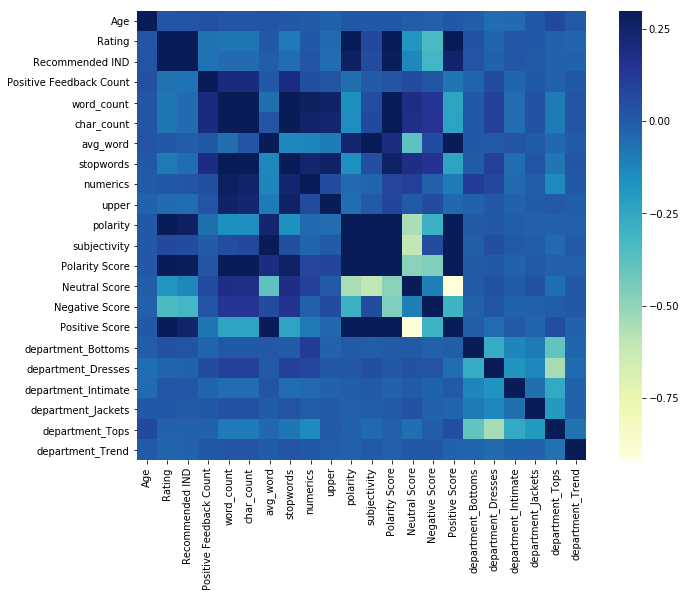

In [47]:
# check correlation before modeling
correlation=df1.corr()
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.heatmap(ax=ax,data=correlation, vmax=.3, square=True, cmap="YlGnBu")

In [48]:
df1.dtypes

Clothing ID                 object
Age                          int64
Title                       object
Review Text                 object
Rating                       int64
Recommended IND              int64
Positive Feedback Count      int64
Division Name               object
Department Name             object
Class Name                  object
word_count                   int64
char_count                   int64
avg_word                   float64
stopwords                    int64
numerics                     int64
upper                        int64
text                        object
polarity                   float64
subjectivity               float64
Polarity Score             float64
Neutral Score              float64
Negative Score             float64
Positive Score             float64
Sentiment                   object
stem                        object
lem                         object
text_new                    object
department_Bottoms           uint8
department_Dresses  

In [49]:
# Random Forest
from sklearn import preprocessing
X=df1[['Age','Rating','Positive Feedback Count','word_count','Polarity Score','department_Bottoms','department_Dresses','department_Intimate','department_Jackets','department_Tops','department_Trend']]
X_scaled=preprocessing.scale(X)
X_scaled=pd.DataFrame(data=X_scaled,columns=X.columns)   #get the column names back
y=df1['Recommended IND']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)
# we can change the test_size
print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 4695
number of training samples: 18777


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 2000, random_state = 20)
rf.fit(X_train, y_train)
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), X_train.columns), 
             reverse=True))

Features sorted by their score:
[(0.6518, 'Rating'), (0.1366, 'Polarity Score'), (0.0834, 'word_count'), (0.0732, 'Age'), (0.0361, 'Positive Feedback Count'), (0.0049, 'department_Tops'), (0.0046, 'department_Dresses'), (0.0039, 'department_Bottoms'), (0.0025, 'department_Intimate'), (0.0023, 'department_Jackets'), (0.0008, 'department_Trend')]


Rating is the most important indicator, followed by Polarity Score. Features of the review and customers's age are surprisingly less important.

In [51]:
# evaluate random forest performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
test_pred=rf.predict(X_test)
train_pred=rf.predict(X_train)
print ("Test Accuracy  : ", accuracy_score(y_test, test_pred))
print (confusion_matrix(y_test, test_pred))

Test Accuracy  :  0.9286474973375932
[[ 714  138]
 [ 197 3646]]


In [52]:
# SVM
from sklearn import svm
svmmodel=svm.SVC(kernel='rbf').fit(X_train,y_train)
yhatsvm=svmmodel.predict(X_test)
print(accuracy_score(y_test, yhatsvm))

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9318423855165069


In [53]:
# logistic regression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)
yhatlr=LR.predict(X_test)
yproblr=LR.predict_proba(X_test)
print(accuracy_score(y_test, yhatlr))

0.9299254526091587


In [54]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
bestScore=0.0
accList=[]

for k in range(3,12):
    
    neigh = KNeighborsClassifier(n_neighbors=k,algorithm='auto')
    
    # using 10 fold cross validation for scoring the classifier's accuracy
    scores = cross_val_score(neigh, X_train, y_train, cv=10)
    score=scores.mean()
    accList.append(score)
    
    if score > bestScore:
        bestScore=score
        best_clf=neigh
        bestK=k
        
print("Best K is :",bestK,"| Cross validation Accuracy :",bestScore)
neigh=best_clf

Best K is : 10 | Cross validation Accuracy : 0.9324705262913028


In [55]:
neigh = KNeighborsClassifier(n_neighbors =4 ).fit(X_train,y_train)
yhatknn = neigh.predict(X_test)
print(accuracy_score(y_test, yhatknn))

0.9282215122470714
